/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


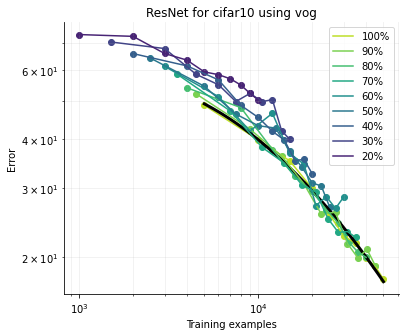

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

for dataset in ['cifar10']:#, 'svhn']:
    for metric in ['vog']:#, 'el2n']:
        frac_list = list(range(100, 10, -10)) if dataset=='cifar10' else [100, 60, 36, 22, 13, 8, 5, 3, 2, 1]

        test_errors = {}
        for initial_size in [x/10 for x in range(1,11)]:
            for frac in frac_list:
                filename = f'./results/errors_{dataset}_{metric}_{initial_size}_{frac}.pkl'
                if os.path.exists(filename):
                    with open(filename, 'rb') as f:
                        test_error, test_loss, training_loss = pickle.load(f)
                        if frac not in test_errors:
                            test_errors[frac] = {}
                        test_errors[frac][initial_size] = test_error[199]



        with sns.color_palette('viridis_r', len(test_errors)):
            plt.figure(figsize=(6,5))
            for frac in test_errors.keys():
                training_examples = [frac*e*50000/100 for e in test_errors[frac].keys()]
                errors = [e for e in test_errors[frac].values()]
                plt.scatter(training_examples,errors)
                plt.plot(training_examples,errors,label=str(int(np.round(frac)))+'%')
                if frac==100:
                    p = np.polyfit(np.log10(training_examples), np.log10(errors), 2)
                    x = np.logspace(np.log10(min(training_examples)), np.log10(max(training_examples)), 100)
                    plt.plot(x, 10**np.polyval(p, np.log10(x)),'k',linewidth=3)
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel('Error')
        plt.xlabel('Training examples')
        plt.legend()
        # plt.xticks([1,2,3],[1,2,3])
        # plt.yticks([2,10,20,50],[2,10,20,50])
        # plt.ylim([10,100])
        # plt.xlim([1000, 500000])
        plt.grid(True,which='both',alpha=0.2)
        plt.title(f'ResNet for {dataset} using {metric}')
        sns.despine()

In [2]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0a0 requires torch==1.11.0a0+17540c5, but you have torch 1.13.0 which is incompatible.
scipy 1.6.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
dask-cudf 21.12.0a0+293.g0930f712e6 requires pandas<1.4.0dev0,>=1.0, but you have pandas 1.5.2 which is incompatible.
cupy-cuda115 9.6.0 requires numpy<1.24,>=1.17, but you have numpy 1.24.2 which is incompatible.
cudf 21.12.0a0+293.g0930f712e6 requires pandas<1.4.0dev0,>=1.0, but you have pandas 1.5.2 which is incompatible.

